Dantar Alejandro Ortiz Vega 6-D

## 1. Generacion de datos ##

In [27]:
import numpy as np
import pandas as pd 
import random 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 
from sklearn.ensemble import IsolationForest

In [28]:
Fechas = pd.date_range(start='2022-01-01', end='2024-04-30', freq='M')
# Se crean las fechas aleatoriamente de ahi que importaramos la libreria de random elegi el primer mes del ultimo dia del 2022 
# Hasta el dia de hoy que hago la actividad 15 de abril del 2024 

In [29]:
Productos = ['Laptops', 'Celulares', 'Smartwatch']
Ventas = []
# Genera datos simulados de los 3 productos que esten en la lista y los almacena en la variable Ventas 

In [30]:
for fecha in Fechas:
    ventas_Laptops = random.randint(100, 300)
    ventas_Celulares = random.randint(150, 400)
    ventas_Smartwatch = random.randint(200, 500)
    Ventas.append([ventas_Laptops, ventas_Celulares, ventas_Smartwatch])
    
# En un for de tal a fecha a tal fecha se hara una generacion aleatoria de las ventas generadas de manera aleatoria, los numeros que estan entre
# los parentesis son el rango que quiero para las ventas simuladas y luego esas ventas se agregan con el .append a un conjunto de datos

In [31]:
df_ventas = pd.DataFrame(Ventas, columns=Productos, index=Fechas)
# Aqui lo que hice fue agrupar las ventas en un dataframe de todos los productos y la cantidad que vendieron

In [32]:
print(df_ventas.to_string())
# Con esto imprimo las ventas desde el primer mes del ultimo del 2022 hasta el 2024 

            Laptops  Celulares  Smartwatch
2022-01-31      146        219         339
2022-02-28      140        311         494
2022-03-31      222        310         462
2022-04-30      285        358         307
2022-05-31      203        370         436
2022-06-30      121        341         406
2022-07-31      208        332         395
2022-08-31      125        400         463
2022-09-30      139        344         201
2022-10-31      269        196         385
2022-11-30      244        221         472
2022-12-31      268        223         275
2023-01-31      184        250         244
2023-02-28      269        370         243
2023-03-31      103        360         452
2023-04-30      254        230         231
2023-05-31      248        326         279
2023-06-30      278        166         276
2023-07-31      212        255         379
2023-08-31      101        307         201
2023-09-30      226        345         399
2023-10-31      235        187         426
2023-11-30 

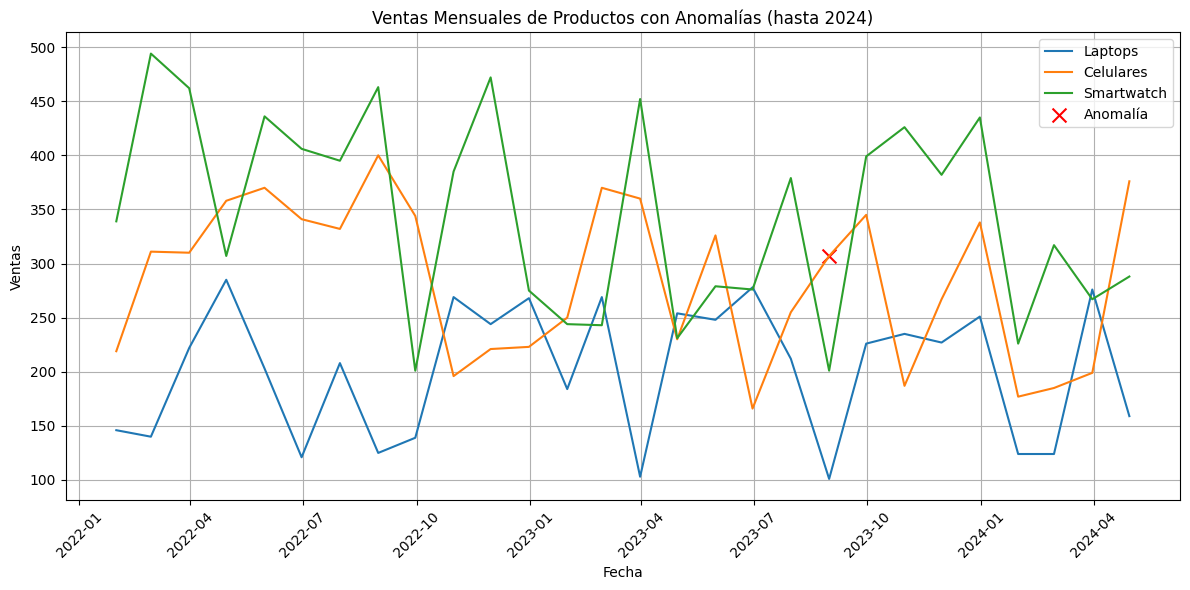

In [33]:
iso_forest = IsolationForest(contamination=0.02)
anomalies = iso_forest.fit_predict(df_ventas)

df_ventas['Anomaly'] = anomalies == -1

# Grafica ventas mensuales y anomalías
fig, ax = plt.subplots(figsize=(12, 6))
for producto in Productos:
    ax.plot(df_ventas.index, df_ventas[producto], label=producto)

ax.scatter(df_ventas.index[df_ventas['Anomaly']],
           df_ventas[df_ventas['Anomaly']].max(axis=1),  
           color='red', label='Anomalía', marker='x', s=100)  

ax.set_title('Ventas Mensuales de Productos con Anomalías (hasta 2024)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Ventas')
ax.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

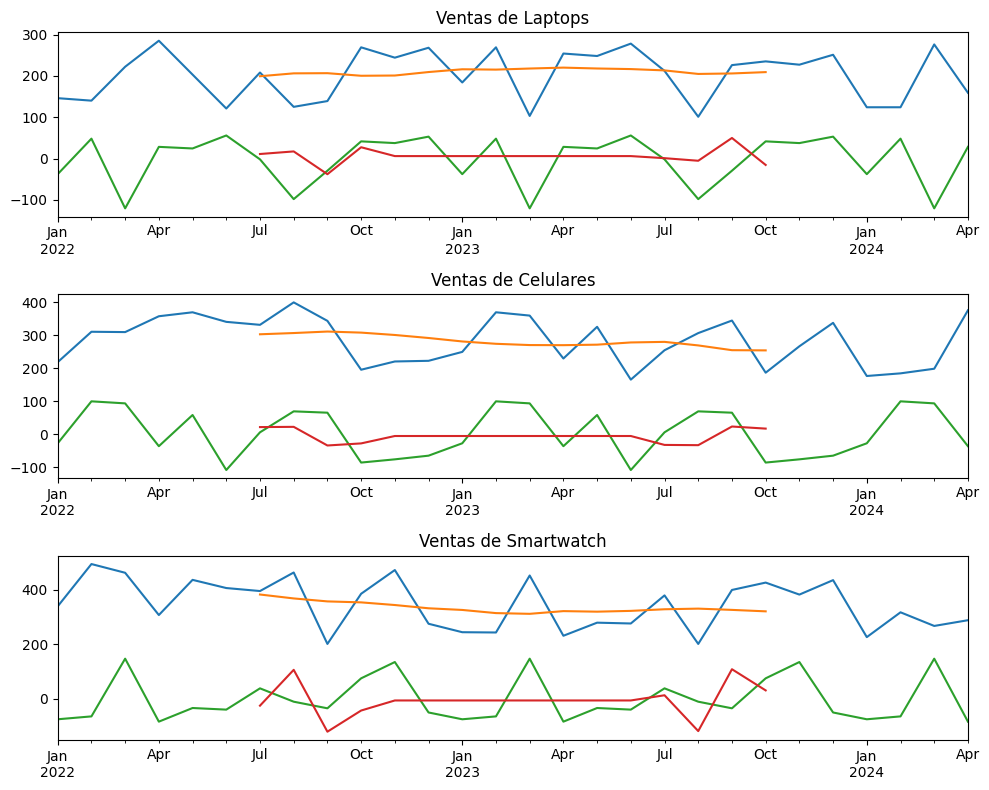

In [34]:
# Calcula la descomposición estacional para cada producto
result_Laptops = seasonal_decompose(df_ventas['Laptops'], model='additive')
result_Celulares = seasonal_decompose(df_ventas['Celulares'], model='additive')
result_Smartwatch = seasonal_decompose(df_ventas['Smartwatch'], model='additive')

# Crea subgráficos para cada producto
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))

# Grafica las partes observadas, de tendencia, estacionales y residuales para cada producto
result_Laptops.observed.plot(ax=axes[0])
axes[0].set_title('Ventas de Laptops')

result_Laptops.trend.plot(ax=axes[0])
result_Laptops.seasonal.plot(ax=axes[0])
result_Laptops.resid.plot(ax=axes[0])

result_Celulares.observed.plot(ax=axes[1])
axes[1].set_title('Ventas de Celulares')

result_Celulares.trend.plot(ax=axes[1])
result_Celulares.seasonal.plot(ax=axes[1])
result_Celulares.resid.plot(ax=axes[1])

result_Smartwatch.observed.plot(ax=axes[2])
axes[2].set_title('Ventas de Smartwatch')

result_Smartwatch.trend.plot(ax=axes[2])
result_Smartwatch.seasonal.plot(ax=axes[2])
result_Smartwatch.resid.plot(ax=axes[2])

plt.tight_layout()
plt.show()



## 2. Analisis de datos ## 

- ¿Hay algún patrón estacional en las ventas de ciertos productos?
  
  Bueno en lo que a mi respecta el patron estacional de los productos como por ejemplo pudiera deberse a las tendencias que hay o por moda es decir por el uso y el incremento en la fabricacion de estos por que siento que es mas accesible para alguien por el uso de su celular

- ¿Se observa alguna tendencia de crecimiento o decrecimiento en las ventas a lo largo del tiempo?
   
   En crecimiento como ya lo dije fue de los smartwatch que fue por la accesibilidad que uno tiene por tener un celular y poder enlazarlo a este pero en decrecimiento fue los celulares que en opinion es por el alto precio que suelen tener estos como la marca iphone que al tener ciertas caracteristicas que los diferencia de otras marcas la demanda si que es grande con esta
  
- ¿Existen meses específicos en los que las ventas tienden a ser más altas o más bajas?

  Unicamente me percate de junio-julio del 2022 que en el producto de laptops si hubo un bajon considerable en sus productos pero en meses posteriores logro nivelarse o mas bien mantenerse sin tener bajones o subidas se mantuvo estable en cuanto a los otros productos permanecian bien con subidas y bajones en algunas ocasiones pero todo bien

## 3.Informe de resultados ##

Bueno el unico resultado al que llegue el cual fue obvio para mi fue la venta de los smartwatchs fue la que tuvo una gran venta en estos 3 años, en la primera grafica que hice marque como x el tope que tuvieron los smartwaches por que es una enorme cantidad que llegaron a vender en uno de los trimestres del 2023 en comparacion de los demas productos que si bien no tuvieron malas ventas no se comparan a lo que los smartwatches tuvieron como las laptops y celulares que tuvieron una venta aceptable